i'm lazy to use mage, so i just use airflow instead. im lying, this one doesnt need airflow. i just use jupyter notebook and ingest manually with dbeaver

In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_params = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "postgres",
    "host": "localhost",  # Change to your database host
    "port": "5432"       # Change to your database port
}
db_url = f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}"
engine = create_engine(db_url)

In [2]:
df = pd.read_sql_query(sql="select * from public.green_tripdata", con=engine)

# Q1

In [3]:
df.shape
# (266855, 20)

(266855, 20)

# Q2

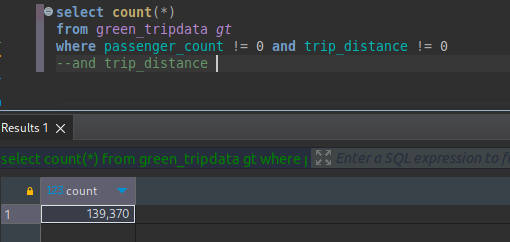

139370

In [4]:
df = df[(df['passenger_count'] != 0) & (df['trip_distance'] != 0)]

# Q3

In [5]:
df['lpep_pickup_date'] = df['lpep_pickup_datetime'].dt.date

In [6]:
df['lpep_pickup_date'].head()

0    2020-10-01
1    2020-10-01
2    2020-10-01
3    2020-10-01
4    2020-10-01
Name: lpep_pickup_date, dtype: object

# Q4

In [7]:
df.VendorID.unique()

array([ 2.,  1., nan])

# Q5

4 col need to be renamed

In [8]:
columns = {'VendorID': 'vendor_id', 'RatecodeID': 'ratecode_id', 'PULocationID': 'pu_location_id', 'DOLocationID': 'do_location_id' }

# Create a mapping of old column names to new column names in snake_case
# column_mapping = {col: col.lower().replace(' ', '_') for col in columns}

# Rename columns using the mapping
df.rename(columns=columns)
        #   inplace=True)

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecode_id,pu_location_id,do_location_id,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_date
0,2.0,2020-10-01 00:31:19,2020-10-01 00:34:55,N,1.0,7,7,1.0,0.79,5,...,0.5,1.58,0,,0.3,7.88,1.0,1.0,0.0,2020-10-01
1,2.0,2020-10-01 00:42:12,2020-10-01 00:43:51,N,1.0,179,7,1.0,0.50,4,...,0.5,0.00,0,,0.3,5.30,2.0,1.0,0.0,2020-10-01
2,2.0,2020-10-01 00:53:09,2020-10-01 00:55:39,N,1.0,179,223,1.0,0.60,4,...,0.5,1.06,0,,0.3,6.36,1.0,1.0,0.0,2020-10-01
3,1.0,2020-10-01 00:12:29,2020-10-01 00:20:08,N,1.0,134,216,2.0,4.40,13,...,0.5,0.00,0,,0.3,14.80,2.0,1.0,0.0,2020-10-01
4,1.0,2020-10-01 00:32:38,2020-10-01 00:43:02,N,1.0,82,7,1.0,2.90,10,...,0.5,0.00,0,,0.3,11.80,2.0,1.0,0.0,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266850,NaN,2020-12-31 23:02:00,2020-12-31 23:16:00,,NaN,174,168,NaN,7.04,20,...,0.0,0.00,0,,0.3,20.63,NaN,NaN,NaN,2020-12-31
266851,NaN,2020-12-31 23:39:00,2020-12-31 23:54:00,,NaN,256,225,NaN,2.79,13,...,0.0,0.00,0,,0.3,13.47,NaN,NaN,NaN,2020-12-31
266852,NaN,2020-12-31 23:09:00,2020-12-31 23:33:00,,NaN,146,10,NaN,12.41,45,...,0.0,2.75,0,,0.3,48.17,NaN,NaN,NaN,2020-12-31
266853,NaN,2020-12-31 23:01:00,2020-12-31 23:12:00,,NaN,196,28,NaN,4.46,13,...,0.0,3.13,0,,0.3,17.39,NaN,NaN,NaN,2020-12-31


# Q6

In [9]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(
    '/home/amal/projects/credentials/ichsanul-dev-cc6f799c9121.json', scopes=['https://www.googleapis.com/auth/cloud-platform']
)

In [10]:
import pandas as pd
from google.cloud import bigquery
from google.cloud import storage
import pyarrow.parquet as pq

# Replace with your own GCP credentials
project_id = "ichsanul-dev"
dataset_id = "de_zoomcamp"
table_id = "green_taxi"

# Assume 'df' is your pandas DataFrame

# Write to BigQuery
def write_to_bigquery(df, project_id, dataset_id, table_id):
    client = bigquery.Client(credentials=credentials, project=project_id)
    dataset_ref = client.dataset(dataset_id)
    table_ref = dataset_ref.table(table_id)

    job_config = bigquery.LoadJobConfig(
        write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE  # Replace table if exists
    )

    job = client.load_table_from_dataframe(df, table_ref, job_config=job_config)
    job.result()

    print(f'Data written to BigQuery table: {project_id}.{dataset_id}.{table_id}')

In [11]:
# # Write to BigQuery
# write_to_bigquery(df, project_id, dataset_id, table_id)

In [12]:
import pyarrow as pa
import pyarrow.parquet as pq

In [13]:
# table = pa.Table.from_pandas(df)

# # Write the PyArrow Table to a partitioned Parquet file in GCP
# pq.write_to_dataset(
#     table,
#     root_path=f"gs://dezoomcamp_ichsanuldev/green",
#     partition_cols=['lpep_pickup_date'],
#     filesystem="gs",
#     use_legacy_dataset=False,
#     # credentials=credentials
# )

In [16]:
len(df.lpep_pickup_date.unique())

95